In [1]:
%matplotlib inline
from pyvista import set_plot_theme
set_plot_theme('document')

Volume Rendering {#volume_rendering_example}
================

Volume render uniform mesh types like
`pyvista.ImageData`{.interpreted-text role="class"} or 3D NumPy arrays.

This also explores how to extract a volume of interest (VOI) from a
`pyvista.ImageData`{.interpreted-text role="class"} using the
`pyvista.ImageDataFilters.extract_subset`{.interpreted-text role="func"}
filter.


In [2]:
import pyvista as pv
from pyvista import examples

# Download a volumetric dataset
vol = examples.download_knee_full()
vol

ImageData (0x1567974c0)
  N Cells:      10225800
  N Points:     10368384
  X Bounds:     0.000e+00, 1.497e+02
  Y Bounds:     0.000e+00, 1.786e+02
  Z Bounds:     0.000e+00, 2.000e+02
  Dimensions:   208, 248, 201
  Spacing:      7.230e-01, 7.230e-01, 1.000e+00
  N Arrays:     1

Simple Volume Render
====================


/Users/b/miniforge3/envs/pht3d/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:33: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


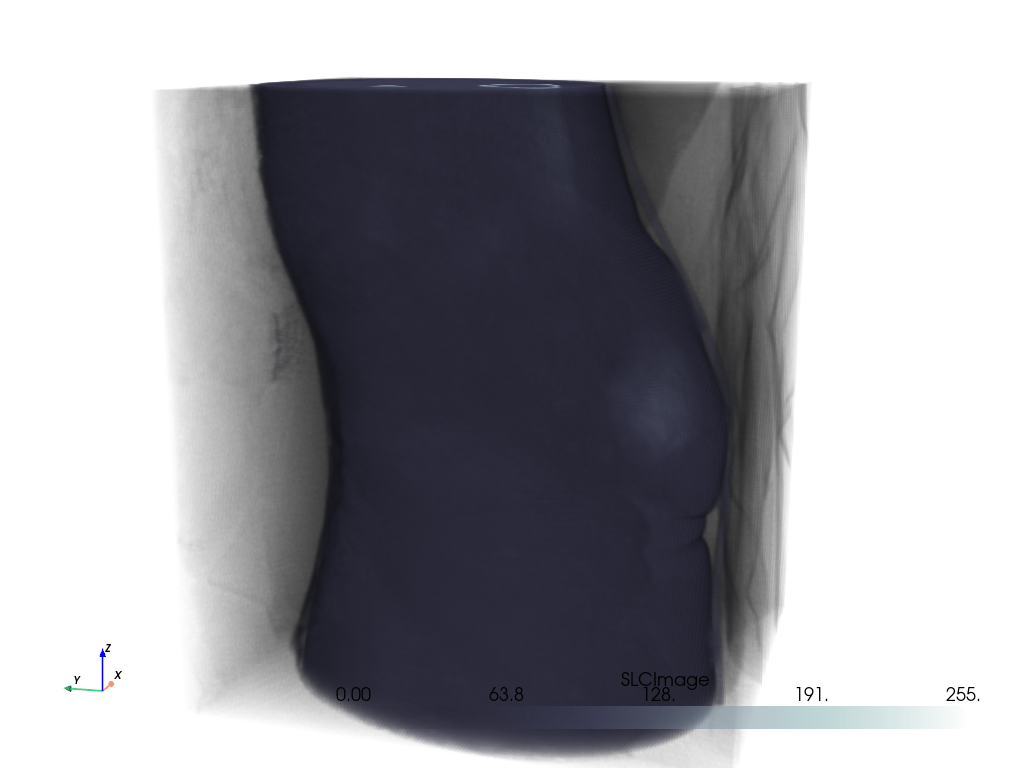

In [23]:
# A nice camera position
cpos = [(-381.74, -46.02, 216.54), (74.8305, 89.2905, 100.0), (0.23, 0.072, 0.97)]

vol.plot(volume=True, cmap="bone", cpos=cpos)

Opacity Mappings
================

Or use the `pyvista.Plotter.add_volume`{.interpreted-text role="func"}
method like below. Note that here we use a non-default opacity mapping
to a sigmoid:


/Users/b/miniforge3/envs/pht3d/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:33: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


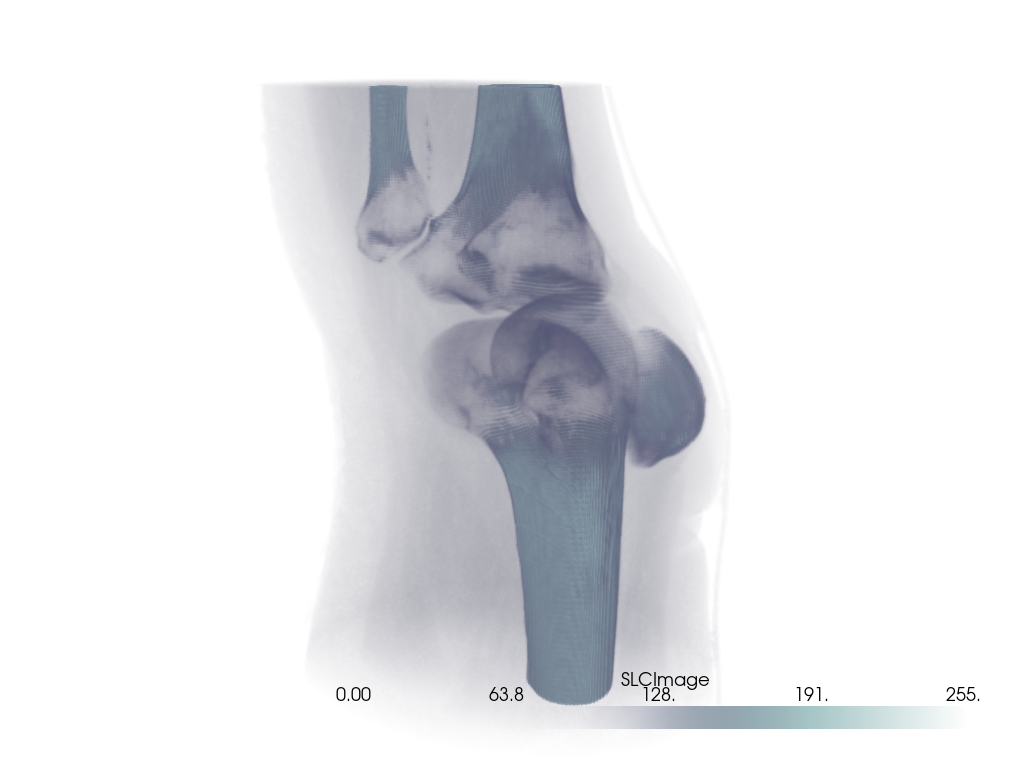

In [6]:
pl = pv.Plotter()
pl.add_volume(vol, cmap="bone", opacity="sigmoid")
pl.camera_position = cpos
pl.show()

You can also use a custom opacity mapping


/Users/b/miniforge3/envs/pht3d/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:33: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


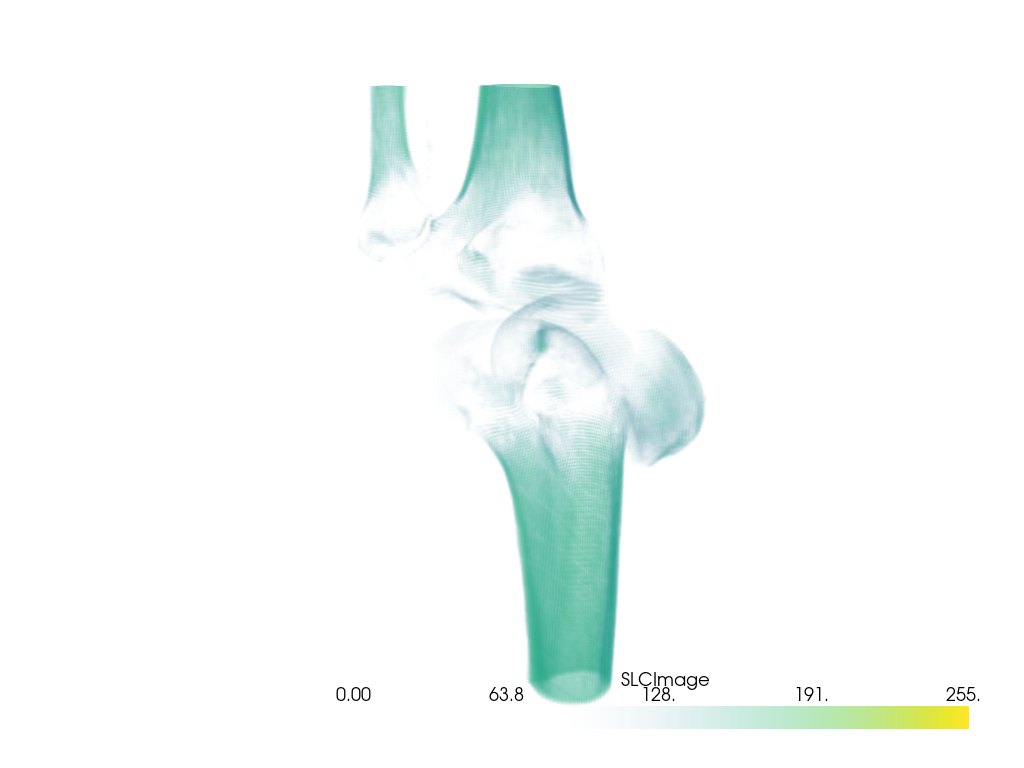

In [24]:
opacity = [0, 0, 0, 0.1, 0.3, 0.6, 1]

pl = pv.Plotter()
pl.add_volume(vol, cmap="viridis", opacity=opacity)
pl.camera_position = cpos
pl.show()

We can also use a shading technique when volume rendering with the
`shade` option


/Users/b/miniforge3/envs/pht3d/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:33: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


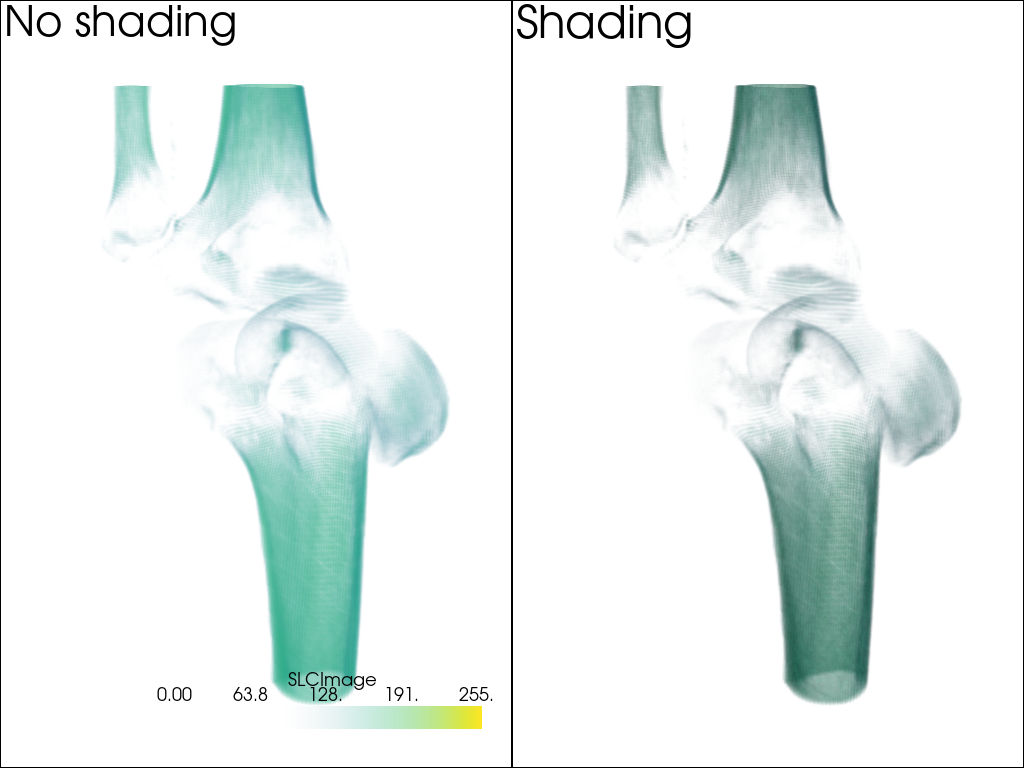

In [25]:
pl = pv.Plotter(shape=(1, 2))
pl.add_volume(vol, cmap="viridis", opacity=opacity, shade=False)
pl.add_text("No shading")
pl.camera_position = cpos
pl.subplot(0, 1)
pl.add_volume(vol, cmap="viridis", opacity=opacity, shade=True)
pl.add_text("Shading")
pl.link_views()
pl.show()

Cool Volume Examples
====================

Here are a few more cool volume rendering examples.


Head Dataset
============


/Users/b/miniforge3/envs/pht3d/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:33: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


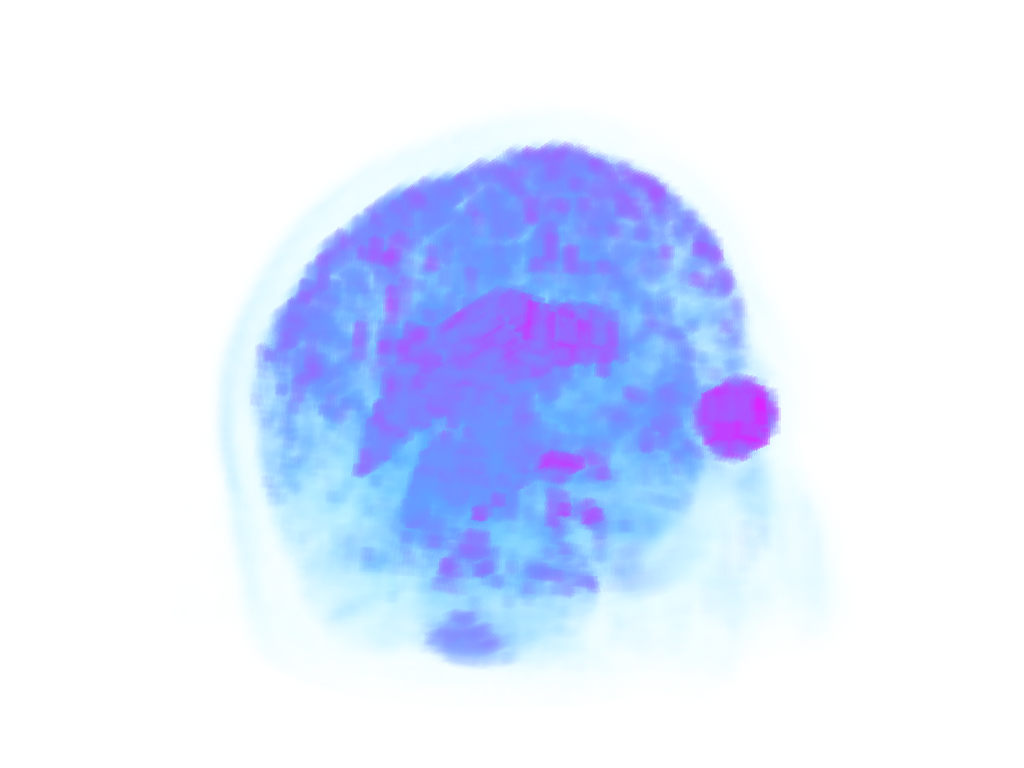

In [26]:
head = examples.download_head()

pl = pv.Plotter()
pl.add_volume(head, cmap="cool", opacity="sigmoid_6", show_scalar_bar=False)
pl.camera_position = [(-228.0, -418.0, -158.0), (94.0, 122.0, 82.0), (-0.2, -0.3, 0.9)]
pl.camera.zoom(1.5)
pl.show()

Bolt-Nut MultiBlock Dataset
===========================

::: {.note}
::: {.admonition-title}
Note
:::

See how we set interpolation to `'linear'` here to smooth out scalars of
each individual cell to make a more appealing plot. Two actor are
returned by `add_volume` because `bolt_nut` is a
`pyvista.MultiBlock`{.interpreted-text role="class"} dataset.
:::


/Users/b/miniforge3/envs/pht3d/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:33: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


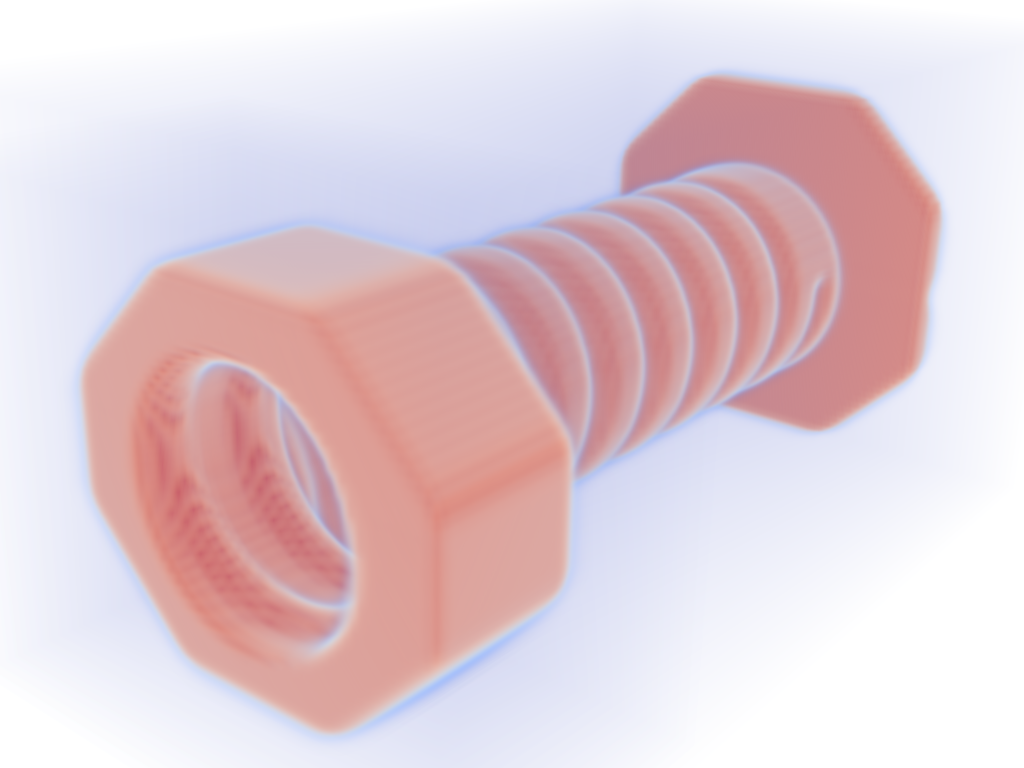

In [27]:
bolt_nut = examples.download_bolt_nut()

pl = pv.Plotter()
actors = pl.add_volume(bolt_nut, cmap="coolwarm", opacity="sigmoid_5", show_scalar_bar=False)
actors[0].prop.interpolation_type = 'linear'
actors[1].prop.interpolation_type = 'linear'
pl.camera_position = [(127.4, -68.3, 88.2), (30.3, 54.3, 26.0), (-0.25, 0.28, 0.93)]
cpos = pl.show(return_cpos=True)

Frog Dataset
============


/Users/b/miniforge3/envs/pht3d/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:33: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


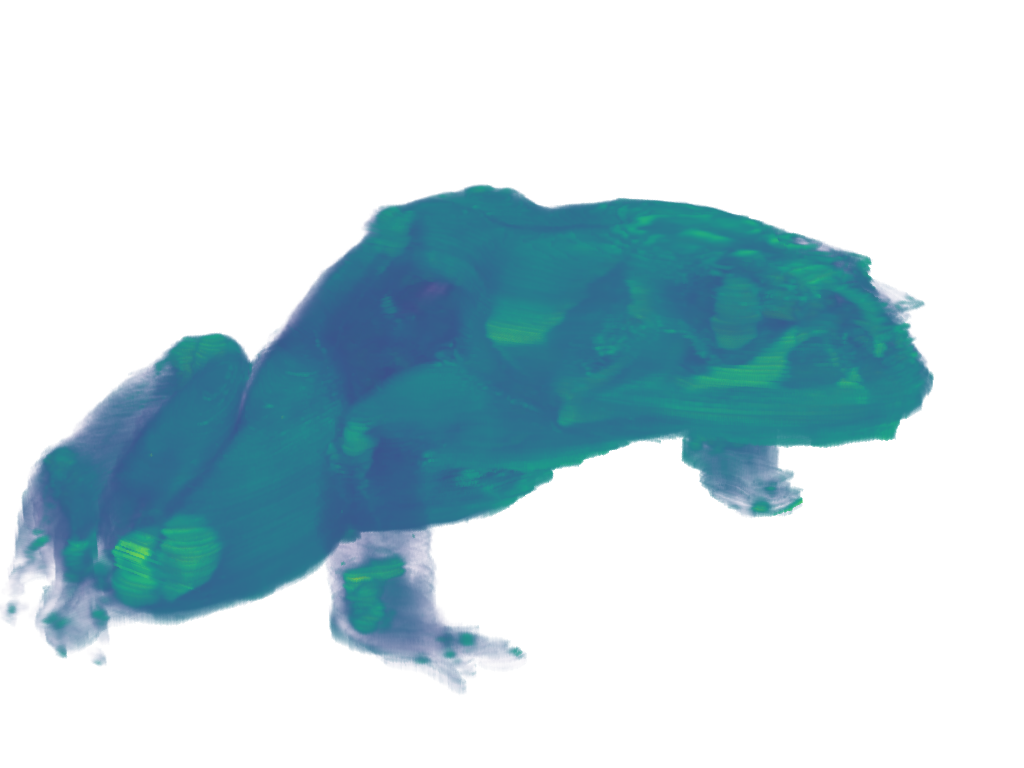

In [28]:
frog = examples.download_frog()

pl = pv.Plotter()
pl.add_volume(frog, cmap="viridis", opacity="sigmoid_6", show_scalar_bar=False)
pl.camera_position = [(929.0, 1067.0, -278.9), (249.5, 234.5, 101.25), (-0.2048, -0.2632, -0.9427)]
pl.camera.zoom(1.5)
pl.show()

Extracting a VOI
================

Use the `pyvista.ImageDataFilters.extract_subset`{.interpreted-text
role="func"} filter to extract a volume of interest/subset volume to
volume render. This is ideal when dealing with particularly large
volumes and you want to volume render only a specific region.


In [ ]:
# Load a particularly large volume
large_vol = examples.download_damavand_volcano()
large_vol

In [ ]:
opacity = [0, 0.75, 0, 0.75, 1.0]
clim = [0, 100]

pl = pv.Plotter()
pl.add_volume(
    large_vol,
    cmap="magma",
    clim=clim,
    opacity=opacity,
    opacity_unit_distance=6000,
)
pl.show()

Woah, that\'s a big volume. We probably don\'t want to volume render the
whole thing. So let\'s extract a region of interest under the volcano.

The region we will extract will be between nodes 175 and 200 on the
x-axis, between nodes 105 and 132 on the y-axis, and between nodes 98
and 170 on the z-axis.


In [ ]:
voi = large_vol.extract_subset([175, 200, 105, 132, 98, 170])

pl = pv.Plotter()
pl.add_mesh(large_vol.outline(), color="k")
pl.add_mesh(voi, cmap="magma")
pl.show()

Ah, much better. Let\'s now volume render that region of interest.


In [ ]:
pl = pv.Plotter()
pl.add_volume(voi, cmap="magma", clim=clim, opacity=opacity, opacity_unit_distance=2000)
pl.camera_position = [
    (531554.5542909054, 3944331.800171338, 26563.04809259223),
    (599088.1433822059, 3982089.287834022, -11965.14728669936),
    (0.3738545892415734, 0.244312810377319, 0.8947312427698892),
]
pl.show()